In [1]:
# Setup
import numpy as np

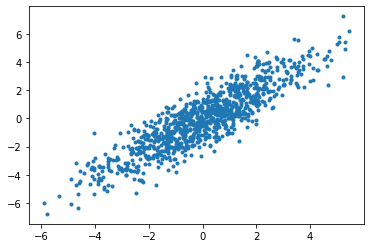

In [2]:
# Simulate Data
N = 1000
K = 10
X = np.random.normal(size = (K,N)) # according to notes, X should be a k x n matrix
E = np.random.normal(size = N)
beta = np.linspace(0,1,num=K)

Y = np.matmul(beta, X) + E

import matplotlib.pyplot as plt
plt.plot(np.matmul(beta,X),Y,'.')

In [3]:
# Question 1: 
def numpy_ols(Y, X):
    '''
    Inputs:
    Y - matrix, outcomes
    X - matrix, observations
    Output:
    beta_hat - array, coefficient relating observations to outcomes
    '''
    XX = np.matmul(X, np.transpose(X))
    XY = np.matmul(X, Y)
    beta_hat = np.linalg.solve(XX, XY)
    return beta_hat

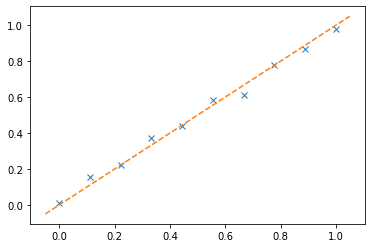

In [4]:
# Checking Answer for Question 1:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

beta_hat = numpy_ols(Y,X)
plt.plot(beta,beta_hat,'x')
abline(1,0)

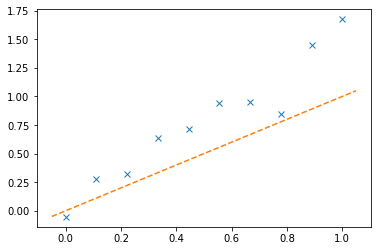

In [10]:
# Question 2: TensorFlow
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(1, input_shape=(K,)))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss ='mse')
hist = model.fit(x = np.transpose(X), y = Y, epochs=100, batch_size=50, verbose=0)
beta_keras = model.layers[0].get_weights()[0]
plt.plot(beta,beta_keras[0:K],'x')
abline(1,0)

In [13]:
def kera_linear(K):
    model_l = Sequential()
    model_l.add(Dense(1, input_shape = (K,)))
    model_l.add(Activation('linear'))
    model_l.compile(optimizer = 'adam', loss = 'mse')
    return model_l

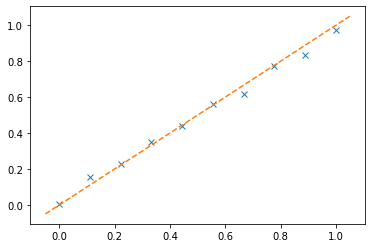

In [14]:
# Output for Question 2
model2 = kera_linear(K)
model2.compile(optimizer='adam', loss='mse')
hist2 = model2.fit(np.transpose(X), Y, epochs=100, batch_size=50, verbose=0);
beta_keras = model2.layers[0].get_weights()[0]
plt.plot(beta,beta_keras[0:K],'x')
abline(1,0)

In [15]:
hist2